In [3]:
%matplotlib inline
import rootpy.ROOT as R
R.gROOT.SetBatch(True)
from rootpy.io import root_open, DoesNotExist
from rootpy.plotting import Canvas, Hist, Legend
import rootpy.plotting.root2matplotlib as rplt
import matplotlib.pyplot as plt

In [5]:
def plot_yield( plc, pad ) :
    can.cd( pad )
    zb = f_zb.Get( plc + "_yield/yield_" + plc + "_0_p" ).Clone( "zb_" + plc )
    zb.SetMarkerColor( R.kBlue )
    zb.SetLineColor( R.kBlue )
    zb.Sumw2()
    zd = f_zd.Get( plc + "_yield/yield_" + plc + "_0_p" ).Clone( "zd_" + plc )
    zd.SetMarkerColor( R.kRed )
    zd.Sumw2()
    
    
    
    if "P" == plc :
        zd.GetYaxis().SetRangeUser( .1, 9  )
#     if "Pi" == plc :
    
    zd.GetYaxis().SetRangeUser( zd.GetMaximum() * 1e-3, zd.GetMaximum()*2  )
    
    zd.GetXaxis().SetRangeUser( 0, 2 )
    zd.SetMarkerStyle( 8 )
    zd.Draw()
    zb.Draw( "same" )
    zb.SetMarkerStyle( 8 )
    R.gPad.SetLogy(1)
    
    can.cd( pad + 3 )
    R.gPad.SetLogy(0)
    eff = zb.Clone("eff").Clone( "eff_"+plc )
    eff.GetXaxis().SetRangeUser( 0, 2 )
    R.gStyle.SetOptStat(0)
    eff.Divide( zd )
    eff.GetYaxis().SetRangeUser( 0.8, 1.1 )
    eff.Draw()
    

In [26]:
f_zd = root_open( "/Users/danielbrandenburg/bnl/local/work/rcpMaker/products/zd/Fit_tof_Pi.root" )
f_zb = root_open( "/Users/danielbrandenburg/bnl/local/work/rcpMaker/products/zb/Fit_tof_Pi.root" )


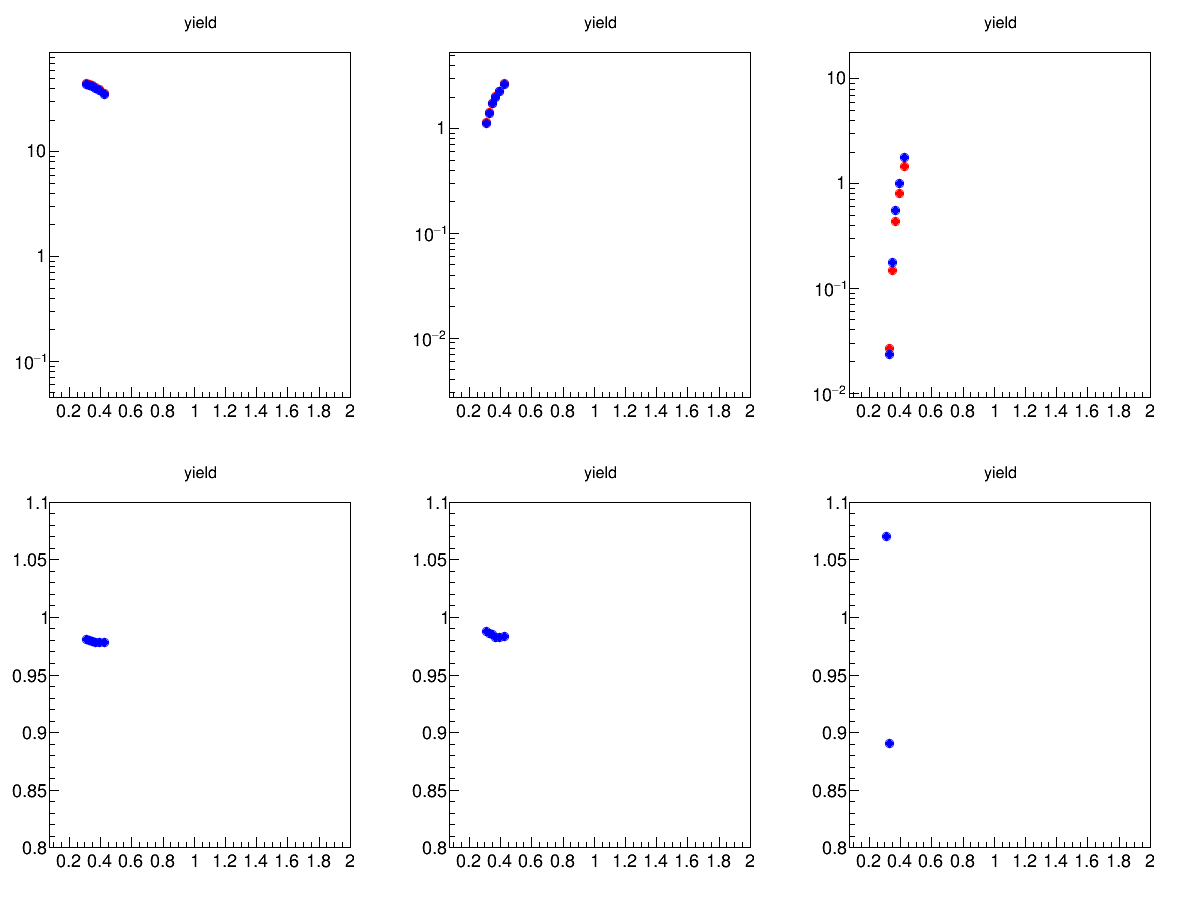

In [27]:
can = Canvas( width=1200, height= 900 )
can.Divide( 3, 2 )
plot_yield( "Pi", 1 )
plot_yield( "K", 2 )
plot_yield( "P", 3 )



can

In [132]:
can.Print( "zb_vs_zd.eps" )
can.Print( "zb_vs_zd.pdf" )